# TASK #1: IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
import xgboost

import warnings
warnings.filterwarnings("ignore")

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

# fnlgwt represents the final weight (estimated number of people)

In [3]:
data = pd.read_csv('data.csv', names = columns)
data.head(5)

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Since our goal is to find whether the person has income above or below 50k, we turn them into 0 and 1
data['Income'] = data['Income'].apply(lambda x:1 if x == ' >50K' else 0)

In [5]:
data.head(5)

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


MINI CHALLENGE #1:
- How many samples do we have in this DataFrame? View the last 10 elements. 



In [6]:
print(data.shape[0], 'samples')
data.tail(10)

32561 samples


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,0
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,0
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


# TASK #2: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# Getting dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [8]:
# Obtain the statistical summary of the dataframe
data.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
# Check for null values
data.isnull().sum().sum()

0

In [10]:
# Get the number of unique values in the workclass
data.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
data.Workclass.mode()[0]

' Private'

In [12]:
# Replace the values '?' with mode() since it is a categorical variable
# The mode of a set of values is the value that appears most often. 
data.Workclass.replace(' ?', data.Workclass.mode()[0], inplace = True)

In [13]:
data['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
# Get the number of unique values in the occupation
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
# Replace the values '?' with mode() since it is a categorical variable
# The mode of a set of values is the value that appears most often. 
data.Occupation.replace(' ?', data.Occupation.mode()[0], inplace = True)

In [16]:
data.Occupation.mode()[0]

' Prof-specialty'

In [17]:
# Get the number of unique values in the native country
data['Native country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
# Replace '?' with 'other'
data['Native country'].replace(' ?',' other', inplace = True)

In [19]:
# Get the correlation
data.corr()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlgwt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hours/Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
Income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


MINI CHALLENGE #2:
- Find the count of each category in the column 'Marital Status' using two methods (External Research is required)

In [20]:
data['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

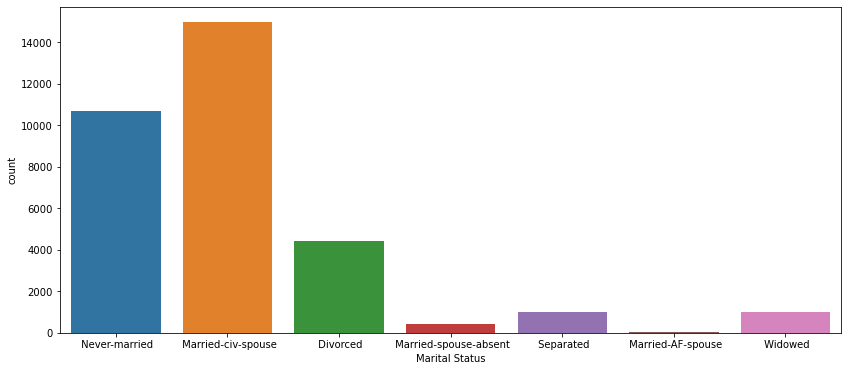

In [21]:
plt.figure(figsize=(14,6));
sns.countplot( data['Marital Status']);

# TASK #3: PERFORM DATA VISUALIZATION

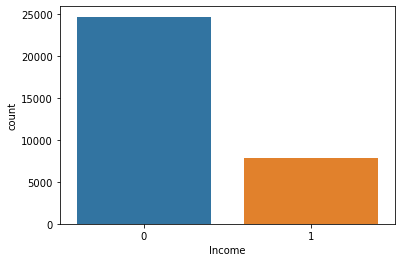

In [22]:
# Visualize the data
sns.countplot("Income", data = data);

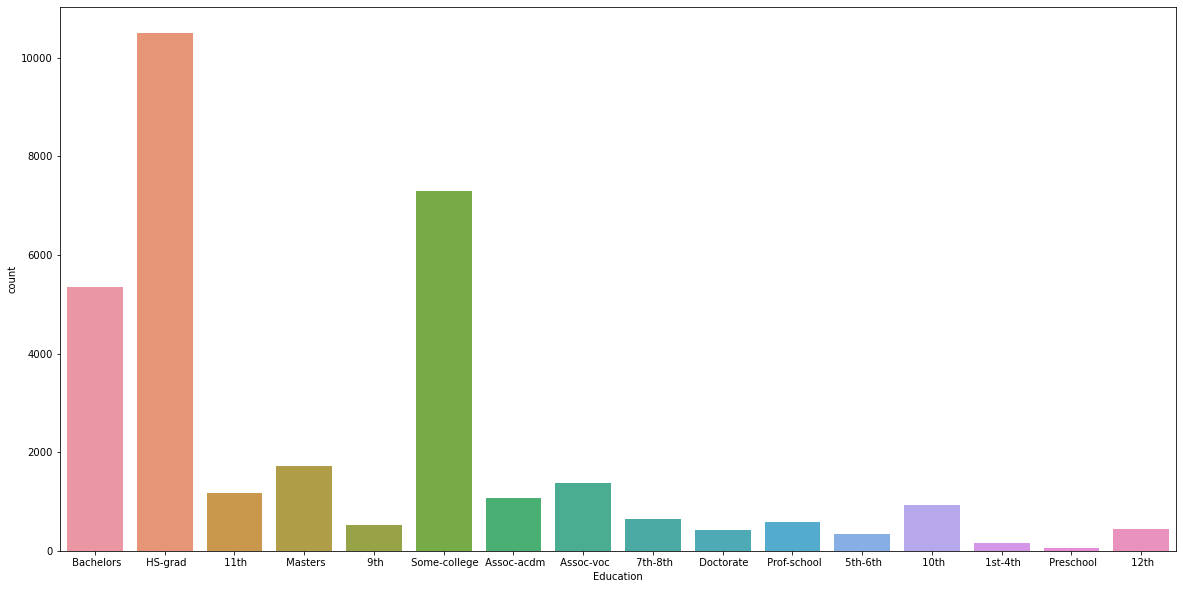

In [23]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.countplot("Education", data = data);

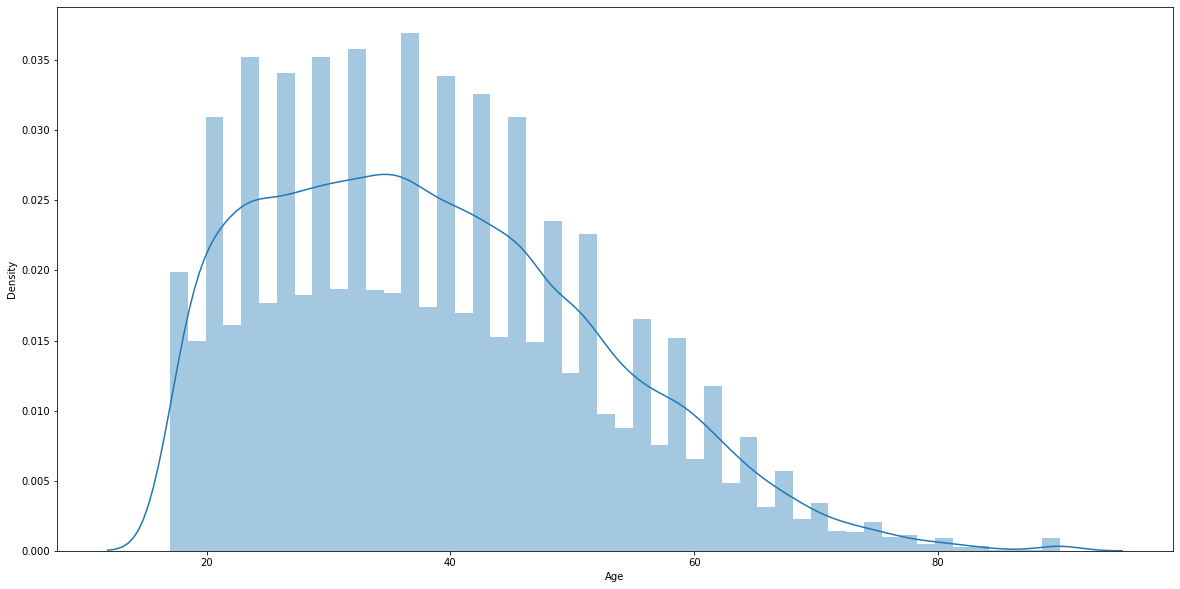

In [24]:
# Visualize the data
plt.figure(figsize = (20,10))
sns.distplot(data.Age);

<Figure size 1440x1440 with 0 Axes>

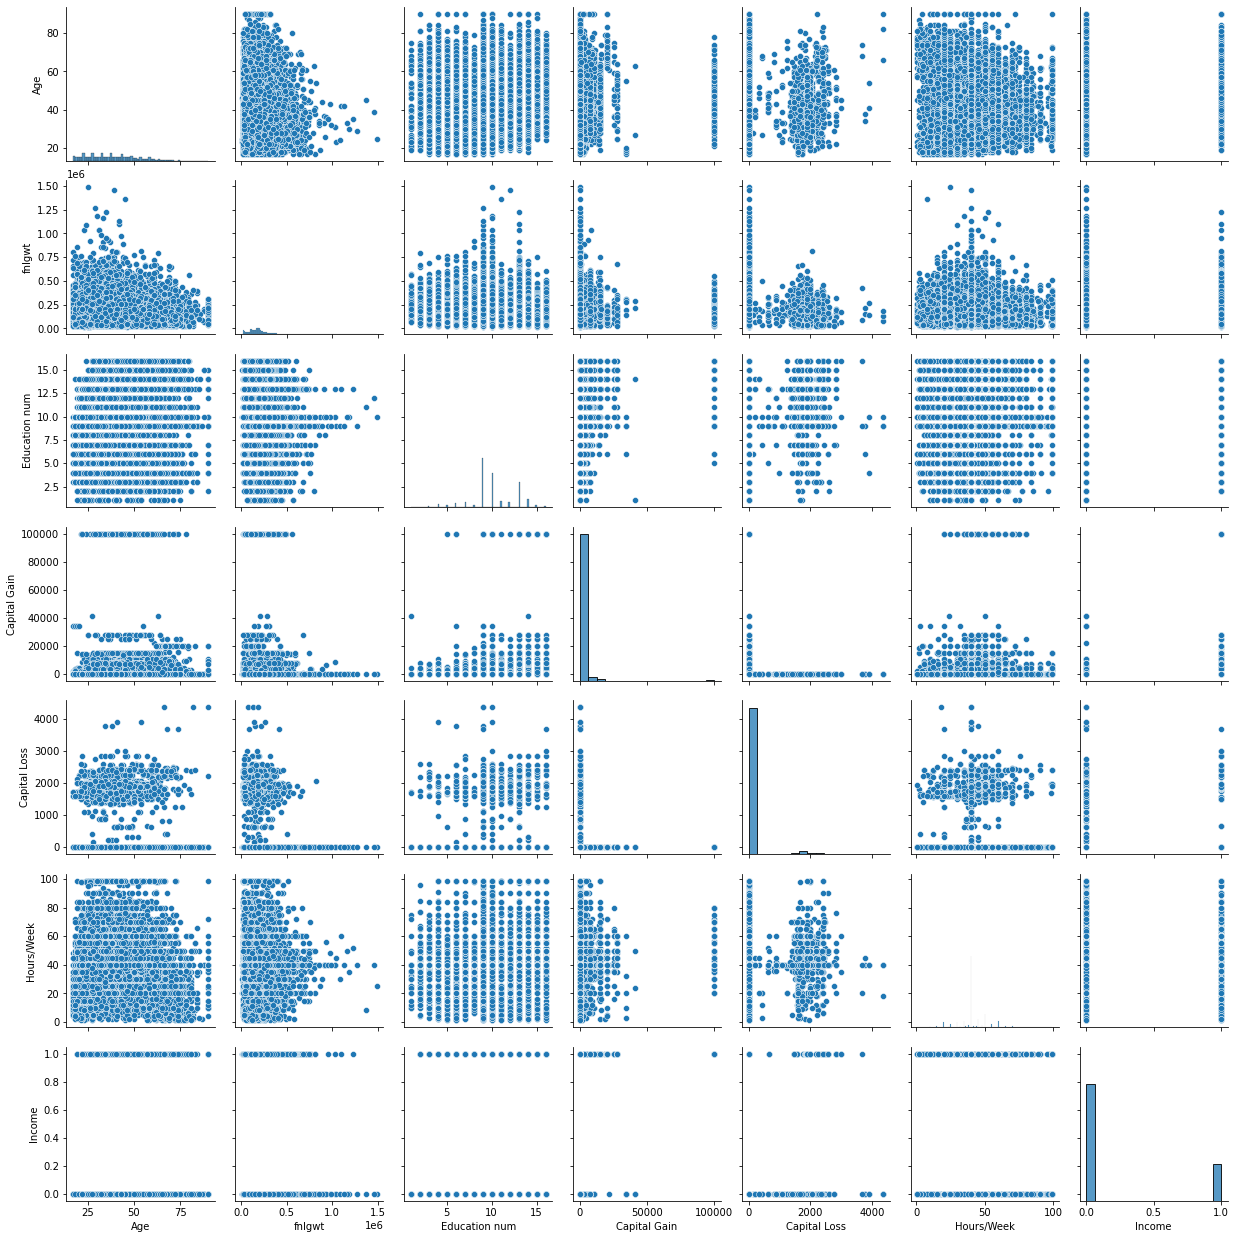

In [26]:
# Plot pairplot
plt.figure(figsize = (20, 20));
sns.pairplot(data);

MINI CHALLENGE #3:
- Plot the correlation matrix for the income DataFrame

<AxesSubplot:>

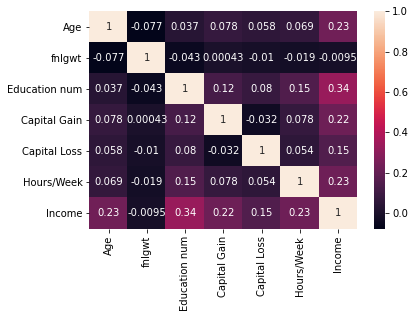

In [27]:
sns.heatmap(data.corr(), annot = True)

# TASK #4: PREPARE THE DATA TO TRAIN THE MODEL

In [28]:
data.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'],
      dtype='object')

In [29]:
X = data.drop('Income', axis = 1)
X.head(5)

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [30]:
y = data.Income
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [31]:
# We need numerical values to feed into  the model, so we use LabelEncoder to encode categorical variables

encode = LabelEncoder()
for i in X.columns:
    X[i] = encode.fit_transform(X[i])

In [32]:
X.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4


In [33]:
# Perform One-hot encoding
features = ['Workclass','Education','Marital Status','Occupation','Relationship','Race','Sex','Native country']

X = pd.get_dummies(X, columns = features)
X.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,...,Native country_32,Native country_33,Native country_34,Native country_35,Native country_36,Native country_37,Native country_38,Native country_39,Native country_40,Native country_41
0,22,2671,12,25,0,39,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,33,2926,12,0,0,12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21,14086,8,0,0,39,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,36,15336,6,0,0,39,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,11,19355,12,0,0,39,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [36]:
# Split the data into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
# print input/output shapes
X_train.shape, X_test.shape

((26048, 106), (6513, 106))

# TASK #5: BUILD AND ASSESS THE PERFORMANCE OF A SIMPLE LOGISTIC REGRESSION MODEL

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
predicted = lr.predict(X_test)
print('TEST ACCURACY: ', accuracy_score(y_test, predicted))

TEST ACCURACY:  0.8423153692614771


In [41]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4906
           1       0.73      0.58      0.64      1607

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



<AxesSubplot:>

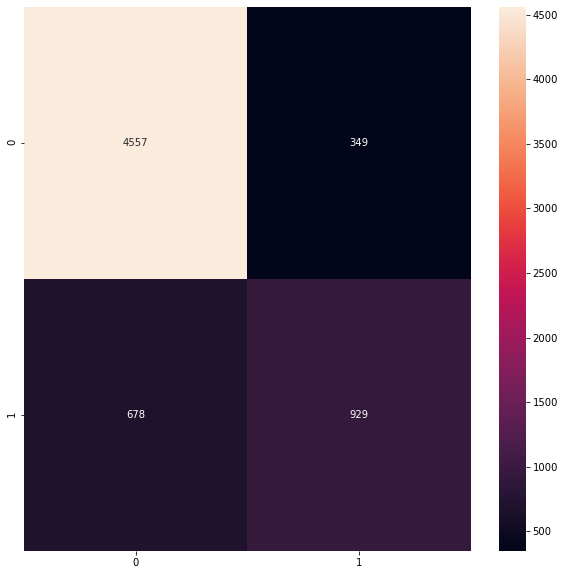

In [42]:
plt.figure(figsize = (10, 10))
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True, fmt = '0.5g')

MINI CHALLENGE #5: 
- Train the logistic regression model with a different solver and regularization. Compare the results with previously obtained ones.


In [43]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
lr.fit(X_train, y_train)
print('TRAINING ACCUARACY:', lr.score(X_train, y_train))

predicted = lr.predict(X_test)
print('TEST ACCURACY: ', accuracy_score(y_test, predicted))

TRAINING ACCUARACY: 0.8506987100737101
TEST ACCURACY:  0.8423153692614771


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4906
           1       0.73      0.58      0.64      1607

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



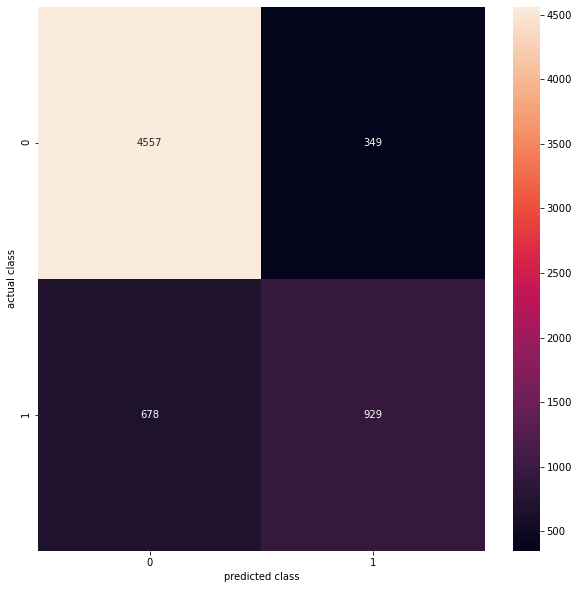

In [44]:
plt.figure(figsize = (10, 10))
cm = confusion_matrix(y_test, predicted) 
sns.heatmap(cm, annot = True,fmt = '.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')
print(classification_report(y_test, predicted))

# TASK #6: BUILD AND ASSESS THE PERFORMANCE OF XGBOOST MODEL

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [51]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

[14:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
pred = xgb.predict(X_test)

In [53]:
pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
print('TEST ACCURACY: ', accuracy_score(y_test, pred))

TEST ACCURACY:  0.8701059419622293


In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4906
           1       0.78      0.66      0.71      1607

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



Text(0.5, 69.0, 'predicted class')

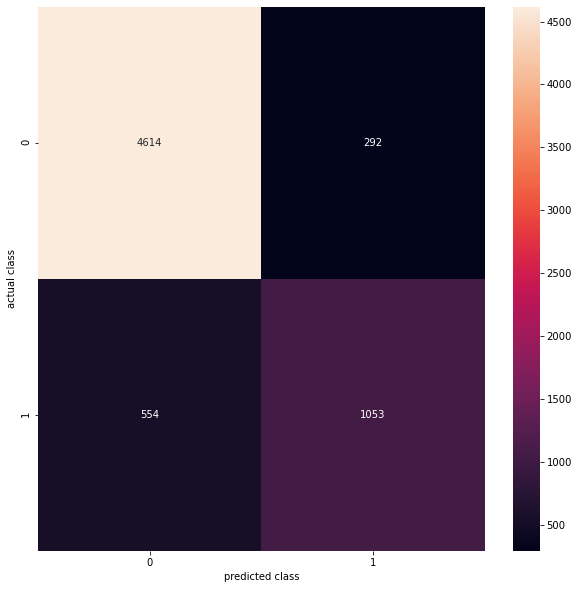

In [56]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, pred) 
sns.heatmap(cm, annot = True,fmt = '.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')